In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
import gammapy

print("numpy:", np.__version__)
print("astropy:", astropy.__version__)
print("gammapy:", gammapy.__version__)

numpy: 1.19.4
astropy: 4.1
gammapy: 0.18.2


In [3]:
from gammapy.data import DataStore, EventList
from gammapy.irf import EffectiveAreaTable2D, load_cta_irfs, Background2D,EnergyDependentMultiGaussPSF,EnergyDispersion2D,Background3D

In [4]:
irf_filename=("../data/Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits.gz")
irfs = load_cta_irfs(irf_filename)
irfs

{'aeff': <gammapy.irf.effective_area.EffectiveAreaTable2D at 0x7ffb8969b630>,
 'bkg': <gammapy.irf.background.Background3D at 0x7ffb896ebba8>,
 'edisp': <gammapy.irf.energy_dispersion.EnergyDispersion2D at 0x7ffb896e2240>,
 'psf': <gammapy.irf.psf_gauss.EnergyDependentMultiGaussPSF at 0x7ffb896d9cf8>}

In [5]:
aeff = EffectiveAreaTable2D.read(irf_filename, hdu="EFFECTIVE AREA")
aeff

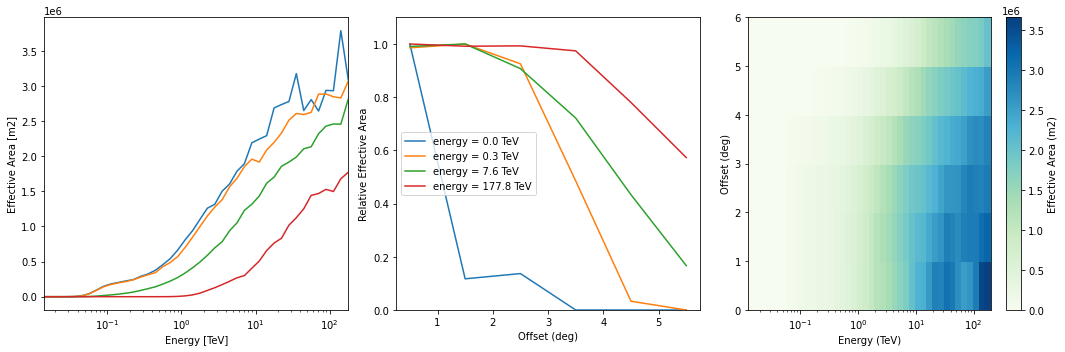

In [6]:
irfs["aeff"].peek()

In [7]:
tirf_filename=("../data/ctools.fits.gz")
tirfs = load_cta_irfs(tirf_filename)
tirfs

Invalid unit found in background table! Assuming (s-1 MeV-1 sr-1)


{'aeff': <gammapy.irf.effective_area.EffectiveAreaTable2D at 0x7ffb896eb780>,
 'bkg': <gammapy.irf.background.Background3D at 0x7ffb8a1b6940>,
 'edisp': <gammapy.irf.energy_dispersion.EnergyDispersion2D at 0x7ffb8a416cc0>,
 'psf': <gammapy.irf.psf_gauss.EnergyDependentMultiGaussPSF at 0x7ffb8a1cb5c0>}

In [8]:
aeff = EffectiveAreaTable2D.read(tirf_filename, hdu="EFFECTIVE AREA")

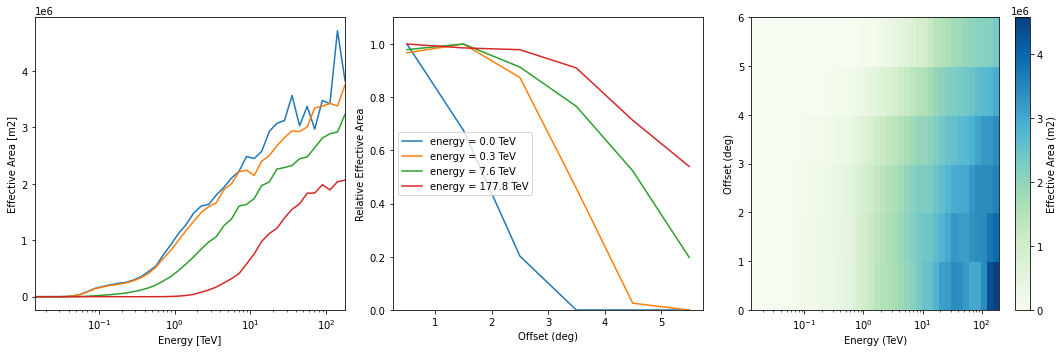

In [9]:
aeff.peek()

In [10]:
bkg = Background3D.read(irf_filename, hdu="BACKGROUND")

/Users/maierg/miniconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/maierg/miniconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


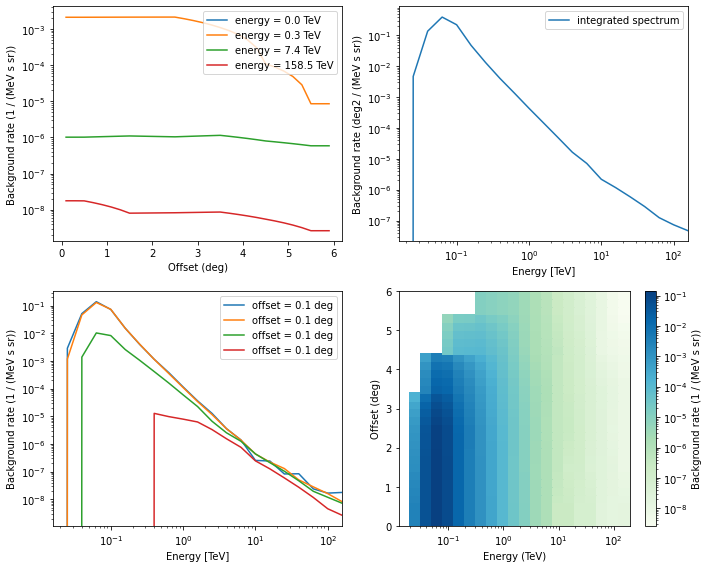

In [11]:
bkg.peek()

In [12]:
bkg2D = Background2D.read(tirf_filename, hdu="BACKGROUND")

Invalid unit found in background table! Assuming (s-1 MeV-1 sr-1)


KeyError: 'THETA_LO'

In [13]:
bkg2D.peek()

NameError: name 'bkg2D' is not defined

In [14]:
bkg3D2 = Background3D.read(tirf_filename, hdu="BACKGROUND")

Invalid unit found in background table! Assuming (s-1 MeV-1 sr-1)


/Users/maierg/miniconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/maierg/miniconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


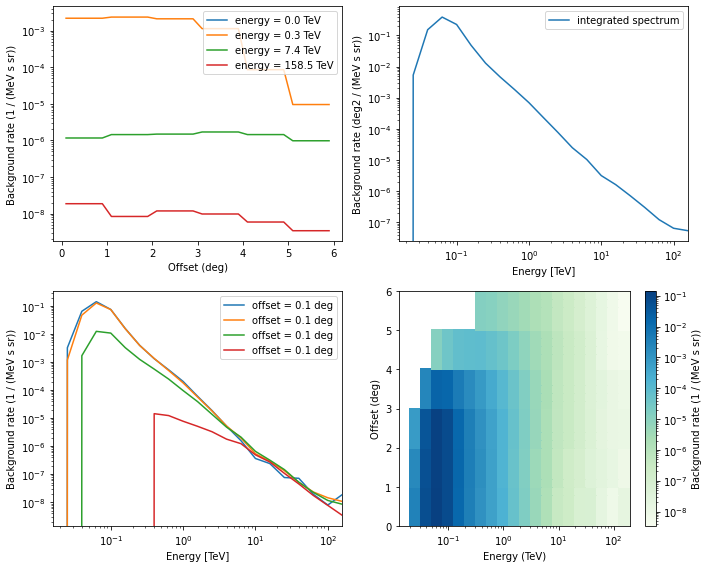

In [63]:
bkg3D2.peek()

In [17]:
psf =  EnergyDependentMultiGaussPSF.read(irf_filename, hdu="POINT SPREAD FUNCTION")

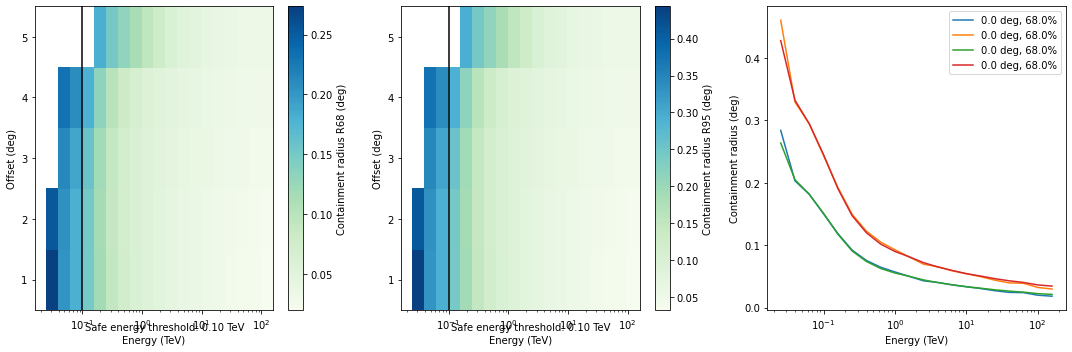

In [18]:
psf.peek()

In [19]:
edisp = EnergyDispersion2D.read(irf_filename, hdu="ENERGY DISPERSION")

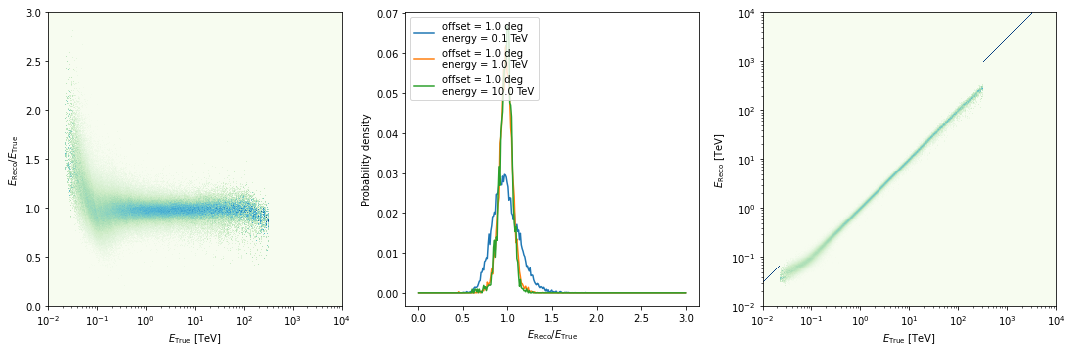

In [20]:
edisp.peek()

In [21]:
edisp.to_edisp_kernel(offset="1 deg")

In [22]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

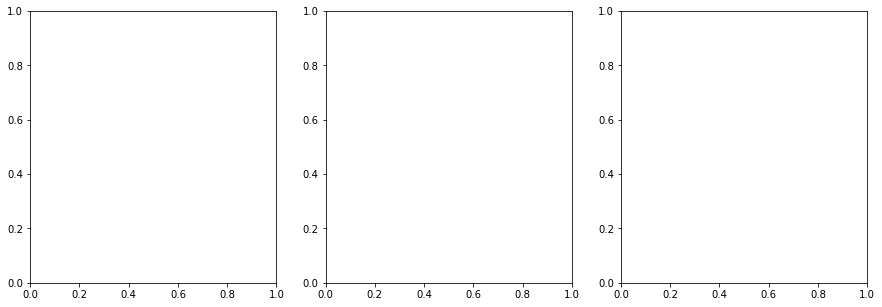

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

In [24]:
edisp.to_edisp_kernel(offset="1 deg")

In [25]:
edisp.plot_bias(ax=axes[2])

In [26]:
 plt.tight_layout()

<Figure size 432x288 with 0 Axes>